In [25]:
import numpy as np

def read_file(file_name: str):
    results = []
    with open(file_name, 'r') as file:
        for line in file:
            line.strip()
            results.append(float(line))
    return results

def get_average(file_name):
    result_list = read_file(file_name)
    results = np.array(list(result_list))
    return sum(results)/len(results)


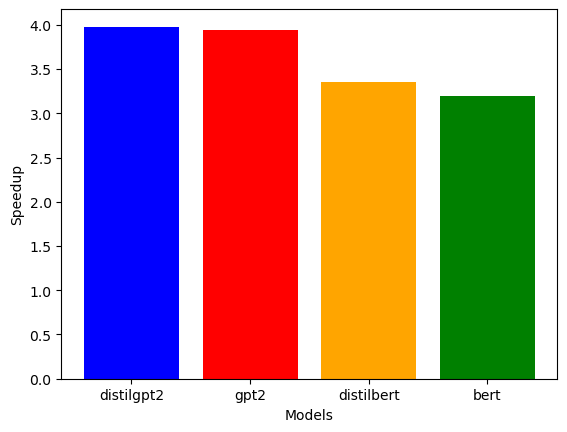

In [31]:
import matplotlib.pyplot as plt
average_distilgpt2_compiled = get_average("gpt2/distilgpt2-compiled.txt")
average_distilgpt2_uncompiled = get_average("gpt2/distilgpt2-uncompiled.txt")
average_gpt2_compiled = get_average("gpt2/gpt2-compiled.txt")
average_gpt2_uncompiled = get_average("gpt2/gpt2-uncompiled.txt")

average_bert_compiled = get_average("bert/bert-base-uncased-compiled.txt")
average_bert_uncompiled = get_average("bert/bert-base-uncased-uncompiled.txt")
average_distilbert_compiled = get_average("bert/distilbert-base-uncased-compiled.txt")
average_distilbert_uncompiled = get_average("bert/distilbert-base-uncased-uncompiled.txt")


speedup_distilgpt = average_distilgpt2_uncompiled / average_distilgpt2_compiled
speedup_gpt = average_gpt2_uncompiled / average_gpt2_compiled
speedup_distilbert = average_distilbert_uncompiled / average_distilbert_compiled
speedup_bert = average_bert_uncompiled / average_bert_compiled


# Plotting the bar chart
plt.bar("distilgpt2", speedup_distilgpt, color='blue')
plt.bar("gpt2", speedup_gpt, color="red")
plt.bar("distilbert", speedup_distilbert, color="orange")
plt.bar("bert", speedup_bert, color="green")


# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Speedup')

# Display the bar chart
plt.show()


